In [25]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
import numpy as np
import matplotlib.pyplot as plt
from tools import load_data
from scipy.stats import multivariate_normal

In [104]:
data = load_data('heightWeight.mat')['heightWeightData']
y = data[:, 0] - 1
x = data[:, 1:]

In [184]:
def gauss_plot_2d(X, mu, cov, color):
    x1_max = np.max(X[:, 0])
    x1_min = np.min(X[:, 0])
    x2_max = np.max(X[:, 1])
    x2_min = np.min(X[:, 1])
    x1 = np.arange(x1_min, x1_max, 0.5)
    x2 = np.arange(x2_min, x2_max, 0.5)
    x, y = np.meshgrid(x1, x2)
    mvn = multivariate_normal(mu, cov)
    arr = []
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            point = (x[i, j], y[i, j])
            arr.append(mvn.pdf(point))
    p = np.array(arr).reshape(x.shape)
    plt.contourf(x, y, p, alpha=0.1, corner_mask=False, colors=color)

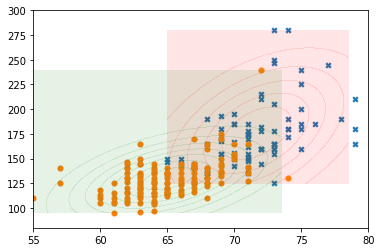

In [185]:
color = ['r', 'g']
marker = ['X', 'o']
plt.axis([55, 80, 80, 300])
for i in range(2):
    idx = np.where(y==i)
    x_sub = x[idx]
    plt.scatter(x_sub[:, 0], x_sub[:, 1], marker=marker[i], linewidths=0.1)
    mu = np.mean(x_sub, axis=0)
    cov = np.cov(x_sub[:, 0], x_sub[:, 1]) * 2
    gauss_plot_2d(x_sub, mu, cov, color[i])
plt.show()